In [46]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve


Constantes e eixos

In [47]:
# frequência de plasmon referência
W_P = 2*np.pi*10000000000.

# constante filtro referência
F = 0.56

# frequência magnética referência
W_0 = 2*np.pi*4000000000.

# vel da luz
C = 300000000

# k do plasmon
K_P = W_P/C

# constante de absorção
mult = 0.02
G_E = mult*W_P/np.sqrt(2.)
G_M = mult*W_P/np.sqrt(2.)

#numero de pontos
NP = int(1000000)

# frequencia onde acontece o spp na polarização TE (ja dividido por W_P)
d = (2.-F)
e = (2.*G_M**2 + (F-4.)*W_0**2)
f = 2.*W_0**4
delta = e**2 - 4*d*f

# aqui nao foi divido por W_P ainda devido ao calculo
wspp_te_escalar = (np.sqrt((-e+np.sqrt(delta))/(2.*d)))
# aqui foi divido por W_P
wspp_te = np.zeros(NP) + wspp_te_escalar/W_P

# frequencia onde acontece o spp na polarização TM, q por sinal, é a mesma do metal
# aqui nao foi divido por W_P ainda devido ao calculo
wspp_tm_escalar = np.sqrt(1/2. - (G_E**2)/(W_P**2))*W_P
# aqui foi divido por W_P
wspp_tm = np.zeros(NP) + wspp_tm_escalar/W_P

# frequencia minima para que haja spp TE q por sinal tbem é a frequência em que
# acontece o spp TM pela divergência de u_2
d = 1.
e = (G_M**2 -2*W_0**2)
f = W_0**4
delta = e**2 - 4*d*f

wmin_te= np.zeros(NP) + W_0/W_P

# frequencia maxima para que haja spp TE
a = 1-F
b = (F-2.)*W_0**2-G_M**2
c = W_0**4
delta = b**2-4*a*c
wmax_te = np.zeros(NP) + (np.sqrt((-b+np.sqrt(delta))/(2.*a)))/W_P

# k_ref para plotar as linhas horizontais
k_ref = np.linspace(0,2,NP)

# variando a frequência
w = np.linspace(0,int(W_P*0.9),NP)


# frequencia normalizada para o gráfico
wwp = w/W_P

# frequencia em que e_2*u_2 = 1
a = -F
b = (F-1)*W_P**2
c = (W_P**2)*(W_0**2)
w_linha = np.sqrt((-b-np.sqrt((b**2)-4*a*c))/(2*a))
w_linha_escalar = w_linha
w_linha = np.zeros(NP)+w_linha/W_P






In [48]:
def e(w):
    return 1 - (W_P**2)/(w**2 + G_E**2)

def u(w):
    return 1 + (F*w**2)*(W_0**2-w**2)/((w**2-W_0**2)**2 + G_M**2*w**2)

def equation(w):
    return e(w) * u(w) - 1

# Encontrar a solução para w' usando fsolve
initial_guess = 0.5*W_P
solution = fsolve(equation, initial_guess)
w_linha_algoritmo = solution[0]
# Exibir a solução encontrada
print("A solução da equação é w' =", w_linha_algoritmo)

A solução da equação é w' = 32636523367.88138


In [49]:
# frequencia limitada pelas condições teóricas para o spp TE
w_lim_te = np.linspace(wspp_te_escalar,w_linha_algoritmo,NP)
w_lim_te_wp = w_lim_te/W_P

w_lim_tm2 = np.linspace(w_linha_algoritmo,wspp_tm_escalar, NP)
w_lim_tm2_wp2 = w_lim_tm2/W_P

Funções

In [50]:
# permissividade elétrica
def e_2(w):
    e_2 = 1 - (W_P**2)/(w**2 + G_E**2)
    return e_2

# permeabilidade elétrica
def u_2(w):
    u_2 = 1 + (F*w**2)*(W_0**2-w**2)/((w**2-W_0**2)**2 + G_M**2*w**2)
    return u_2

# condição do decaimento exponencial em z
def k_exp(w2, e_2, u_2):
    k_exp_ = np.sqrt(e_2(w2)*u_2(w2)*(w2**2)/(C**2))
    return k_exp_

# dispersão tanto tm quanto te
def k_spp_tm(w, e_2, u_2):

    k_spp_tm = (w/W_P)*np.sqrt(e_2(w)*(e_2(w)-u_2(w))/(e_2(w)**2 - 1))

    return k_spp_tm

# dispersão tanto tm quanto te
def k_spp_tm2(w, e_2, u_2):

    k_spp_tm2 = (w/W_P)*np.sqrt(e_2(w)*(e_2(w)-u_2(w))/(e_2(w)**2 - 1))

    return k_spp_tm2

def k_spp_te(w, e_2, u_2):
    k_spp_te = (w/W_P)*np.sqrt(u_2(w)*(u_2(w)-e_2(w))/(u_2(w)**2 - 1))

    return k_spp_te



In [51]:
NP2 = 100000
intervalo = np.linspace(W_0, 0.45*W_P, NP2)
lista = []

for freq in intervalo:
    valor1 = k_exp(freq, e_2, u_2)
    if not np.isnan(valor1):
        valor1 = valor1/K_P
        valor2 = k_spp_tm(freq, e_2, u_2)
        comp = np.abs(valor1-valor2)
        if comp < 0.00005:
            lista.append((comp,freq))
if lista:
    tupla_menor_x = min(lista, key=lambda tupla: tupla[0])
    w_max_spptm1 = tupla_menor_x[1]
else:
    w_max_spptm1 = w_linha_algoritmo

/tmp/ipykernel_206565/1491341628.py:13: RuntimeWarning: invalid value encountered in sqrt
  k_exp_ = np.sqrt(e_2(w2)*u_2(w2)*(w2**2)/(C**2))
/tmp/ipykernel_206565/1491341628.py:19: RuntimeWarning: invalid value encountered in sqrt
  k_spp_tm = (w/W_P)*np.sqrt(e_2(w)*(e_2(w)-u_2(w))/(e_2(w)**2 - 1))


In [52]:
w_lim_tm = np.linspace(0,w_max_spptm1,NP)
w_lim_tm_wp = w_lim_tm/W_P

In [53]:
# puxando os valores da dispersão
k_spp_te_var = k_spp_te(w_lim_te, e_2, u_2)
k_spp_tm_var = k_spp_tm(w_lim_tm, e_2, u_2)
k_spp_tm2 = k_spp_tm2(w_lim_tm2, e_2, u_2)

/tmp/ipykernel_206565/1491341628.py:31: RuntimeWarning: invalid value encountered in sqrt
  k_spp_te = (w/W_P)*np.sqrt(u_2(w)*(u_2(w)-e_2(w))/(u_2(w)**2 - 1))
/tmp/ipykernel_206565/1491341628.py:19: RuntimeWarning: invalid value encountered in sqrt
  k_spp_tm = (w/W_P)*np.sqrt(e_2(w)*(e_2(w)-u_2(w))/(e_2(w)**2 - 1))
/tmp/ipykernel_206565/1491341628.py:26: RuntimeWarning: invalid value encountered in sqrt
  k_spp_tm2 = (w/W_P)*np.sqrt(e_2(w)*(e_2(w)-u_2(w))/(e_2(w)**2 - 1))


Gráfico e suas configurações

/tmp/ipykernel_206565/1491341628.py:13: RuntimeWarning: invalid value encountered in sqrt
  k_exp_ = np.sqrt(e_2(w2)*u_2(w2)*(w2**2)/(C**2))


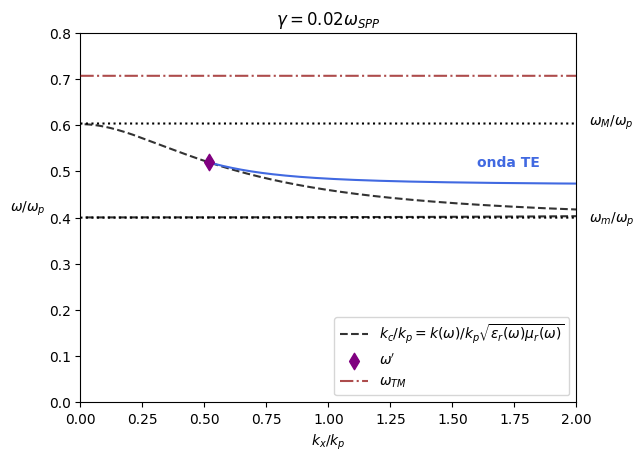

In [54]:
# configurações do gráfico
fig, ax = plt.subplots()

# plot do sppTE
ax.plot(k_spp_te_var, w_lim_te_wp, color="royalblue", zorder=9)
#ax.plot(w_lim_te_wp, k_spp_te_var)


## plot do sppTM
#ax.plot(k_spp_tm_var, w_lim_tm_wp, color="crimson", zorder=9)
#ax.plot(k_spp_tm2, w_lim_tm2_wp2, color="crimson", zorder=9)

## plot da condição de decaimento em z (limite onde surgem as spp TE e TM)
ax.plot(k_exp(w, e_2, u_2)/K_P, (wwp), color="black", linestyle='--', alpha=0.8, label=r'$k_c/k_p=k(\omega)/k_p\sqrt{\epsilon_r(\omega)\mu_r(\omega)}$', zorder=6)

# plot da dispersao luz vácuo
#ax.plot( wwp, wwp, color="skyblue", linestyle='--', label=r'$\omega = ck$', zorder=8)

## frequencia w', onde os 3 dispersões se encontram
#ax.plot(k_ref, w_linha)
plt.scatter(k_exp(w_linha_algoritmo, e_2, u_2)/K_P, w_linha_algoritmo/W_P, color='purple', marker='d', s=70, zorder=10, label=r'$\omega$' + r"$'$")

## frequencia do spp te
#ax.plot(k_ref, wspp_te, color='darkblue', linestyle='-.', label=r'$\omega_{TE}$', alpha=0.7, zorder=7)

## frequencia do spp tm2
ax.plot(k_ref, wspp_tm,color='darkred', linestyle='-.', label=r'$\omega_{TM}$', alpha=0.7, zorder=7)

## frequencia mínima do intervalo te (primeiro spp tm)
ax.plot(k_ref, wmin_te, color="black", linestyle=':', zorder=5)

## frequencia máxima do intervalo te
ax.plot(k_ref, wmax_te, color="black", linestyle=':', zorder=5)




# limites dos eixos
ax.set(xlim=(0,2))
ax.set(ylim=(0,0.8))

# sombreamento entre as curvas
#plt.fill_between(k_exp(w, e_2, u_2)/K_P, wwp, wmin_te, color='gray', alpha=0.2)
#plt.fill_between(k_exp(w, e_2, u_2)/K_P, wwp, wmax_te, color='black', alpha=0.3)

# inserir legendas da curva
plt.legend(loc='lower right')

# inserir nome dos eixos
plt.xlabel(r'$k_x/k_p$')
plt.ylabel(r'$\omega/\omega_p$', rotation=0, labelpad=15)

# inserir titulo
SPP = '{SPP}'
plt.title(fr'$\gamma = {mult}\omega_{SPP}$')

# inserindo textos no gráfico
plt.text(2.05, 0.6, r'$\omega_M/\omega_p$', fontsize=10)
plt.text(2.05, 0.39, r'$\omega_m/\omega_p$', fontsize=10)
#plt.text(0.3, 0.2, 'onda TM', fontsize=10, color="crimson", fontweight='bold')
#plt.text(1.6, 0.64, 'onda TM', fontsize=10, color="crimson", fontweight='bold')
plt.text(1.6, 0.51, 'onda TE', fontsize=10, color="royalblue", fontweight='bold')


plt.show()